In [1]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('./data/owid-covid-data.xlsx')
df1["date"]= pd.to_datetime(df1['date'],errors='coerce')

In [3]:
疫情高峰 = df1[df1['date'] == '2020-12-10']

In [4]:
累计确诊人数排名 = 疫情高峰[疫情高峰['continent'].notnull()].drop_duplicates(subset=['location'],keep='last',inplace=False).sort_values(by='total_cases',ascending=False)
累计确诊人数世界前十 = 累计确诊人数排名.iloc[:10]
新增确诊人数排名 = 疫情高峰[疫情高峰['continent'].notnull()].drop_duplicates(subset=['location'],keep='last',inplace=False).sort_values(by='new_cases',ascending=False)
新增确诊人数世界前十 = 新增确诊人数排名.iloc[:10]
累计确诊人数占人口比 = pd.DataFrame(疫情高峰['total_cases'] / 疫情高峰['population'],columns=['R1'])
疫情高峰.loc[:,'R1'] = 累计确诊人数占人口比
累计确诊人数占人口比排名 = 疫情高峰[疫情高峰['continent'].notnull()].drop_duplicates(subset=['location'],keep='last',inplace=False).sort_values(by='R1',ascending=False)
累计确诊人数占人口比排名前十 = 累计确诊人数占人口比排名.iloc[:10]

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [5]:
累计死亡人数排名 = 疫情高峰[疫情高峰['continent'].notnull()].drop_duplicates(subset=['location'],keep='last',inplace=False).sort_values(by='total_deaths',ascending=False)
累计死亡人数排名前十 = 累计死亡人数排名.iloc[:10]
新增死亡人数排名 = 疫情高峰[疫情高峰['continent'].notnull()].drop_duplicates(subset=['location'],keep='last',inplace=False).sort_values(by='new_deaths',ascending=False)
新增死亡人数排名前十 = 新增死亡人数排名.iloc[:10]
病死率 = pd.DataFrame(疫情高峰['total_deaths'] / 疫情高峰['total_cases'],columns=['R2'])
疫情高峰.loc[:,'R2'] = 病死率
病死率排名 = 疫情高峰[疫情高峰['continent'].notnull()].drop_duplicates(subset=['location'],keep='last',inplace=False).sort_values(by='R2',ascending=False)
病死率排名前十 = 病死率排名.iloc[:10]

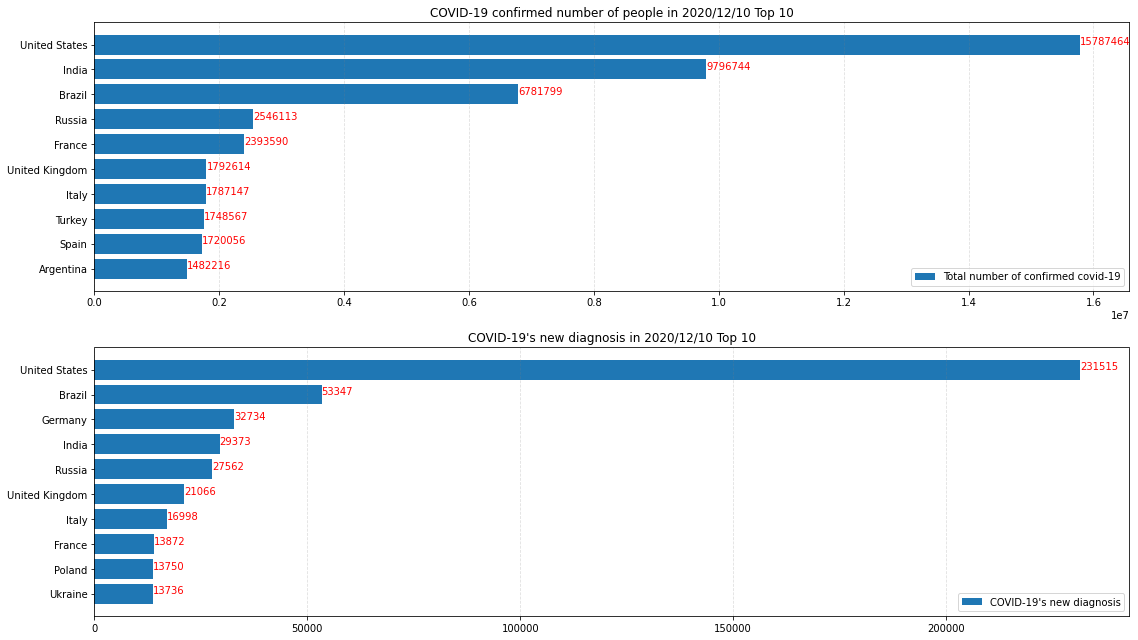

In [6]:
fig, ax = plt.subplots(2,1,figsize=(16, 9))
# 累计确诊人数世界前十
ax[0].barh(累计确诊人数世界前十['location'],累计确诊人数世界前十['total_cases'],label='Total number of confirmed covid-19')
ax[0].set_title('COVID-19 confirmed number of people in 2020/12/10 Top 10')
ax[0].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
ax[0].invert_yaxis()
for i, (value, name) in enumerate(zip(累计确诊人数世界前十['total_cases'], 累计确诊人数世界前十['location'])):
    ax[0].text(value, i,int(value),ha='left',color='red')
ax[0].legend()
# 新增确诊人数世界前十
ax[1].barh(新增确诊人数世界前十['location'],新增确诊人数世界前十['new_cases'],label='COVID-19\'s new diagnosis')
ax[1].set_title('COVID-19\'s new diagnosis in 2020/12/10 Top 10')
ax[1].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
ax[1].invert_yaxis()
for i, (value, name) in enumerate(zip(新增确诊人数世界前十['new_cases'], 新增确诊人数世界前十['location'])):
    ax[1].text(value, i,int(value),ha='left',color='red')
ax[1].legend()
plt.tight_layout()
plt.show()

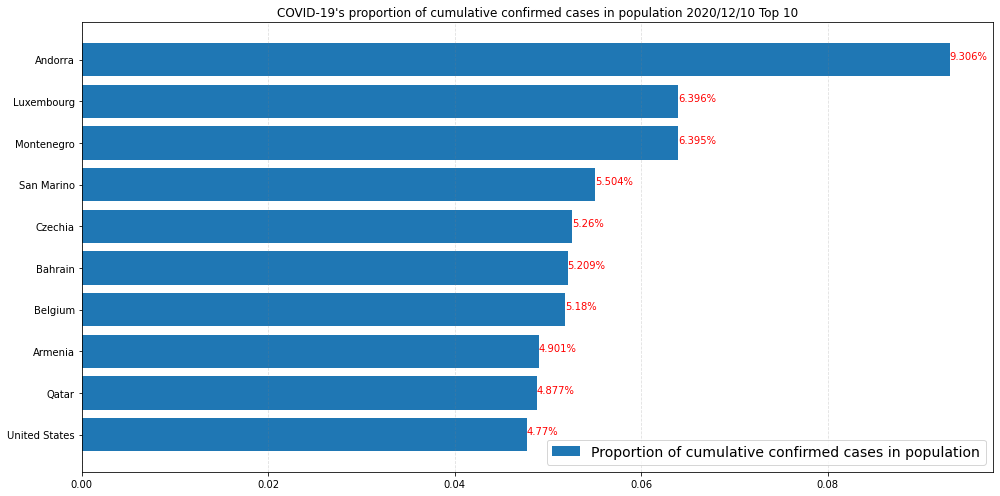

In [7]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.barh(累计确诊人数占人口比排名前十['location'],累计确诊人数占人口比排名前十['R1'],label='Proportion of cumulative confirmed cases in population')
ax.set_title('COVID-19\'s proportion of cumulative confirmed cases in population 2020/12/10 Top 10')
ax.xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
ax.invert_yaxis()
ax.legend(fontsize=5)
for i, (value, name) in enumerate(zip(累计确诊人数占人口比排名前十['R1'], 累计确诊人数占人口比排名前十['location'])):
    ax.text(value, i,str(round(float(value)*100,3))+'%',ha='left',color='red')
    
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

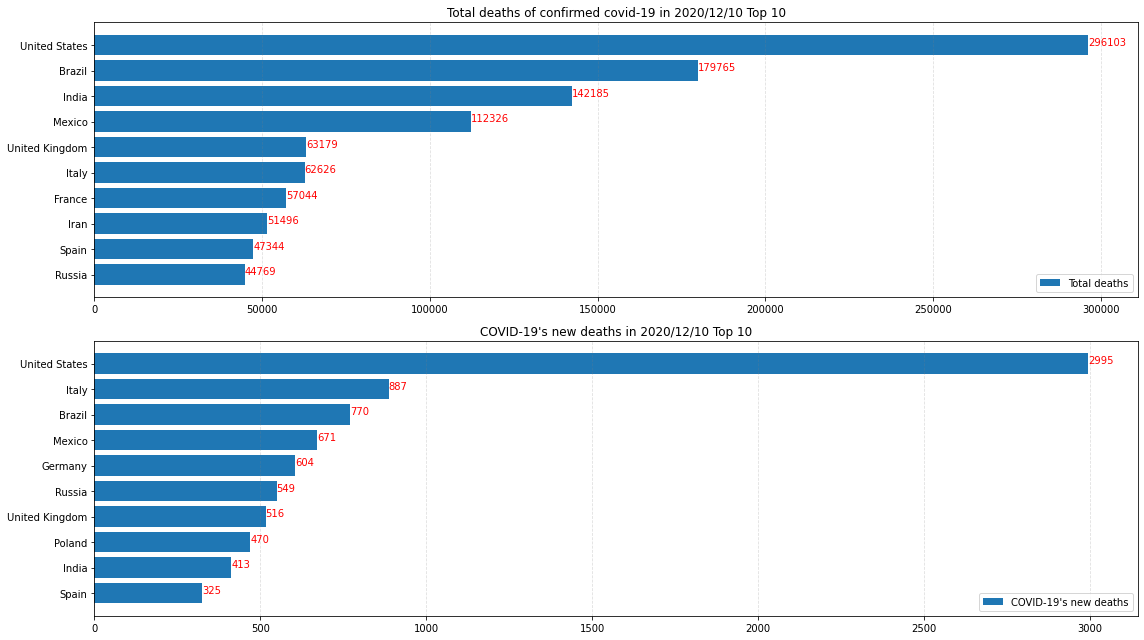

In [8]:
fig, ax = plt.subplots(2,1,figsize=(16, 9))
# 累计死亡人数排名前十
ax[0].barh(累计死亡人数排名前十['location'],累计死亡人数排名前十['total_deaths'],label='Total deaths')
ax[0].set_title('Total deaths of confirmed covid-19 in 2020/12/10 Top 10')
ax[0].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
ax[0].invert_yaxis()
for i, (value, name) in enumerate(zip(累计死亡人数排名前十['total_deaths'], 累计死亡人数排名前十['location'])):
    ax[0].text(value, i,int(value),ha='left',color='red')
ax[0].legend()
# 新增死亡人数排名前十
ax[1].barh(新增死亡人数排名前十['location'],新增死亡人数排名前十['new_deaths'],label='COVID-19\'s new deaths')
ax[1].set_title('COVID-19\'s new deaths in 2020/12/10 Top 10')
ax[1].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
ax[1].invert_yaxis()
for i, (value, name) in enumerate(zip(新增死亡人数排名前十['new_deaths'], 新增死亡人数排名前十['location'])):
    ax[1].text(value, i,int(value),ha='left',color='red')
ax[1].legend()
plt.tight_layout()
plt.show()

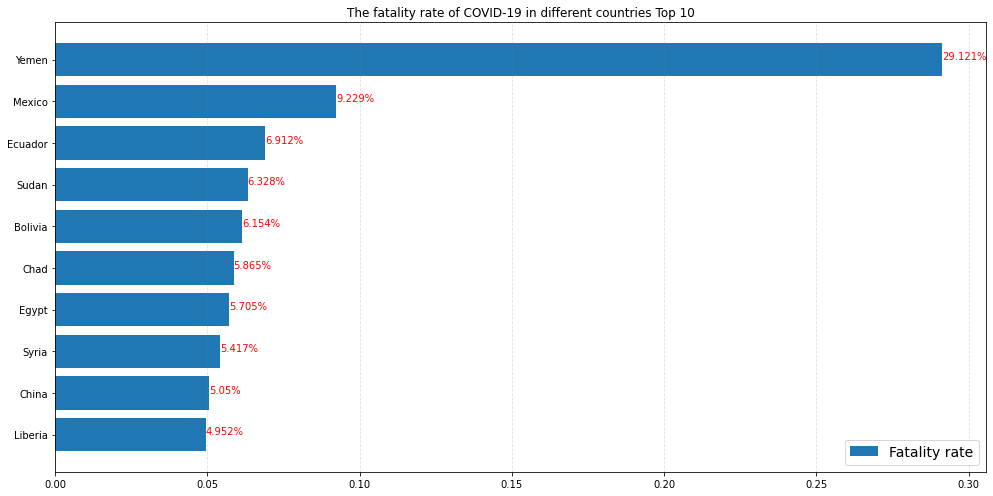

In [9]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.barh(病死率排名前十['location'],病死率排名前十['R2'],label='Fatality rate')
ax.set_title('The fatality rate of COVID-19 in different countries Top 10')
ax.xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
ax.invert_yaxis()
ax.legend(fontsize=5)
for i, (value, name) in enumerate(zip(病死率排名前十['R2'], 病死率排名前十['location'])):
    ax.text(value, i,str(round(float(value)*100,3))+'%',ha='left',color='red')
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

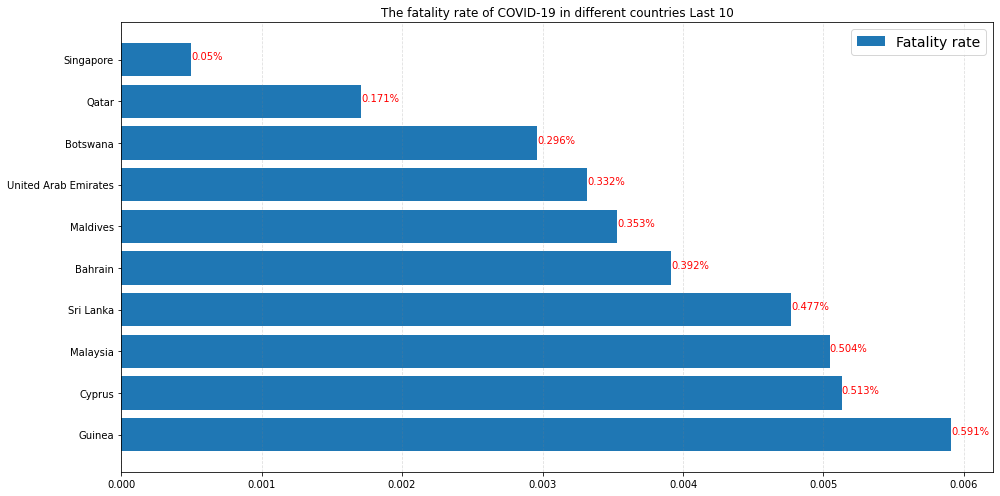

In [10]:
病死率排名后十 = 疫情高峰[疫情高峰['total_cases']>=10000].sort_values(by='R2',ascending=True).iloc[:10]

fig, ax = plt.subplots(figsize=(14, 7))
ax.barh(病死率排名后十['location'],病死率排名后十['R2'],label='Fatality rate')
ax.set_title('The fatality rate of COVID-19 in different countries Last 10')
ax.xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
ax.invert_yaxis()
ax.legend(fontsize=5)
for i, (value, name) in enumerate(zip(病死率排名后十['R2'], 病死率排名后十['location'])):
    ax.text(value, i,str(round(float(value)*100,3))+'%',ha='left',color='red')
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

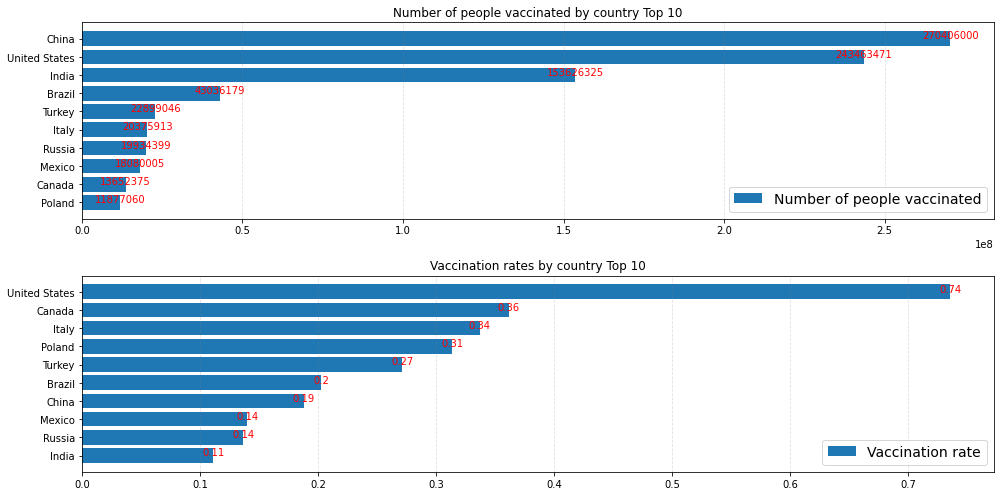

In [11]:
疫苗 = df1.drop_duplicates(subset='location',keep='last')
疫苗 = 疫苗[疫苗['continent'].notnull()]
疫苗 = 疫苗.sort_values(by='total_vaccinations',ascending=False).iloc[:10]
fig,ax = plt.subplots(2,1,figsize=(14,7))
ax[0].barh(疫苗['location'],疫苗['total_vaccinations'],label='Number of people vaccinated')
ax[0].set_title('Number of people vaccinated by country Top 10')
ax[0].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
ax[0].invert_yaxis()
ax[0].legend(fontsize=5)
for i, (value, name) in enumerate(zip(疫苗['total_vaccinations'], 疫苗['location'])):
    ax[0].text(value, i,int(value),ha='center',color='red')
ax[0].legend(fontsize=14)


疫苗['疫苗人口比'] = 疫苗['total_vaccinations'] / 疫苗['population']
疫苗 = 疫苗.sort_values(by='疫苗人口比',ascending=False).iloc[:10]

ax[1].barh(疫苗['location'],疫苗['疫苗人口比'],label='Vaccination rate')
ax[1].set_title('Vaccination rates by country Top 10')
ax[1].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
ax[1].invert_yaxis()
ax[1].legend(fontsize=5)
for i, (value, name) in enumerate(zip(疫苗['疫苗人口比'], 疫苗['location'])):
    ax[1].text(value, i,round(float(value),2),ha='center',color='red')

ax[1].legend(fontsize=14)    
plt.tight_layout()
plt.show()